## Planning
# Key Objectives:
1. Clean the data
2. Complete features selection
3. Generate exploratory plots using matplotlib
4. Generate interactive plots using plotly

In [98]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from pathlib import Path
from typing import List, Dict

plt.style.use("ggplot")

CWD = Path.cwd()
DATA_DIR: Path = CWD.parent / "data"
SURVEY_PATH: Path = DATA_DIR / "survey_results_public.csv"
SURVEY_SCHEMA: Path = DATA_DIR / "survey_results_schema_dropcols.csv"

In [45]:
survey_raw: pd.DataFrame = pd.read_csv(SURVEY_PATH)
survey_schema: pd.DataFrame = pd.read_csv(SURVEY_SCHEMA)

In [50]:
def get_column_variants(list1: list, list2: list) -> list:
    return [x for x in list1 if any(y in x and x!=y for y in list2)]


def generate_drop_colnames(stem: str) -> List[str]:
    return stem + "WantToWorkWith", stem + "Admired"


def drop_unwanted_cols(df: pd.DataFrame) -> pd.DataFrame:
    """
    Drop columns using survey schema "drop" column (created manually).
    Additional manual correction was required because some columns didn't map
    / new columns were added compared to the reported schema.
    """
    dropcols = (
        survey_schema
        .loc[survey_schema["drop"] == 1, "qname"]
        .to_list()
    )
    df_columns = df.columns.to_list()  # survey columns don't match schema
    unmatched_colums = list(set(dropcols) - set(df_columns))
    matched_dropcols = [elem for elem in dropcols if elem not in unmatched_colums]
    cols_to_drop_new = get_column_variants(list1=df_columns, list2=dropcols)
    dropcols = matched_dropcols + cols_to_drop_new
    missed_cols = [
        "Language", "Database", "Platform",
        "Webframe", "Embedded", "MiscTech",
        "ToolsTech", "NEWCollabTools", "OfficeStackAsync"
    ]
    dropcols += [x for stem in missed_cols for x in generate_drop_colnames(stem)]
    result = df.drop(columns=dropcols, axis=1, inplace=False)
    return result

In [72]:
df = drop_unwanted_cols(survey_raw)
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'EmbeddedHaveWorkedWith',
       'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'ICorPM',
       'WorkExp', 'Industry', 'ConvertedCompYearly', 'JobSat'],
      dtype='object')


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

[array(['I am a developer by profession', 'I am learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)]


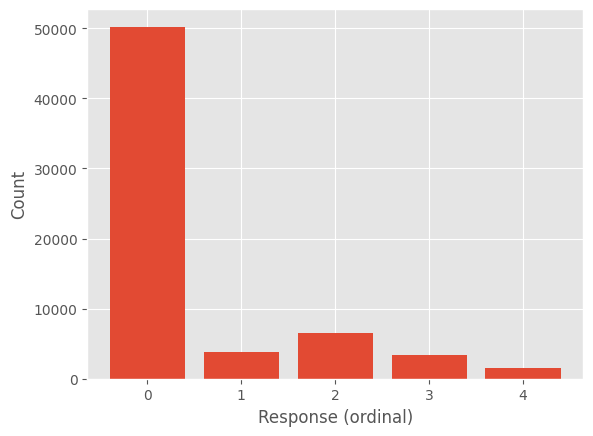

In [105]:
def plot_mainbranch(df: pd.DataFrame) -> None:
    ordinal_encoder = OrdinalEncoder()
    mainbranch_ordinal = (
        ordinal_encoder
        .fit_transform(df["MainBranch"]
                       .to_numpy()
                       .reshape(-1, 1))
    )
    categories_nums, categories_count = np.unique(mainbranch_ordinal, return_counts=True)
    print(ordinal_encoder.categories_)
    plt.bar(
        x=categories_nums,
        height=categories_count,
    )
    plt.xlabel("Response (ordinal)")
    plt.ylabel("Count")
    plt.show()

plot_mainbranch(df)

In [108]:
# df.Employment.unique()

In [ ]:
# Clean and filter the data
# Drop rows where any of the following columns are null
df_salary = df.dropna(subset=["ConvertedCompYearly"])
filter_values: dict = {
    "Check": ["Apples"],
    "MainBranch": ["I am a developer by profession"],
    "Employment": ["Employed, full time"],
}
df_salary = df_salary[df_salary["Check"] == "Apples"]
df_salary = df_salary.drop([
    "Age", "Employment", "OrgSize", "RemoteWork", "Check", "EdLevel",
    "YearsCode"
])
display(df_salary.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      23435 non-null  int64  
 1   MainBranch                      23435 non-null  object 
 2   Age                             23435 non-null  object 
 3   Employment                      23435 non-null  object 
 4   RemoteWork                      23427 non-null  object 
 5   Check                           23435 non-null  object 
 6   EdLevel                         23435 non-null  object 
 7   YearsCode                       23388 non-null  object 
 8   YearsCodePro                    23345 non-null  object 
 9   DevType                         23403 non-null  object 
 10  OrgSize                         23410 non-null  object 
 11  Country                         23435 non-null  object 
 12  Currency                        2343

None

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      23435 non-null  int64  
 1   MainBranch                      23435 non-null  object 
 2   Age                             23435 non-null  object 
 3   Employment                      23435 non-null  object 
 4   RemoteWork                      23427 non-null  object 
 5   Check                           23435 non-null  object 
 6   EdLevel                         23435 non-null  object 
 7   YearsCode                       23388 non-null  object 
 8   YearsCodePro                    23345 non-null  object 
 9   DevType                         23403 non-null  object 
 10  OrgSize                         23410 non-null  object 
 11  Country                         23435 non-null  object 
 12  Currency                        2343

None

In [ ]:
# Drop columns to only skill columns relevant to salary
# df_salary.info()
df_salary.describe()
# df_salary[["ConvertedCompYearly", "CompTotal", "Currency", "Country"]]